<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#### Load the csv file

In [2]:
# type your code here
df=pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [3]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

In [5]:
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(include="object")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

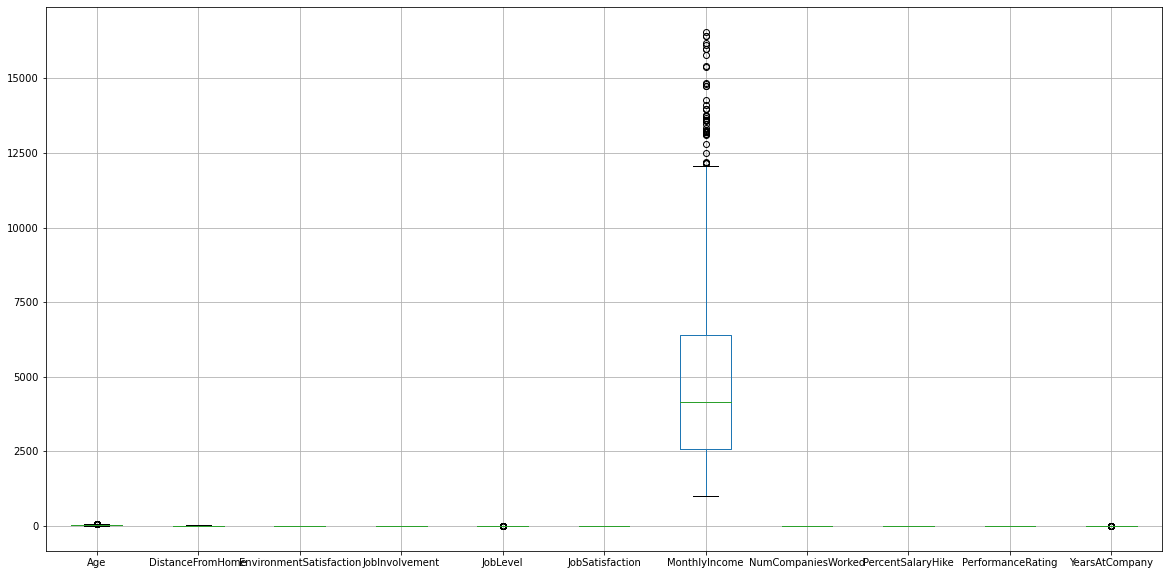

In [6]:
# type your code here
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

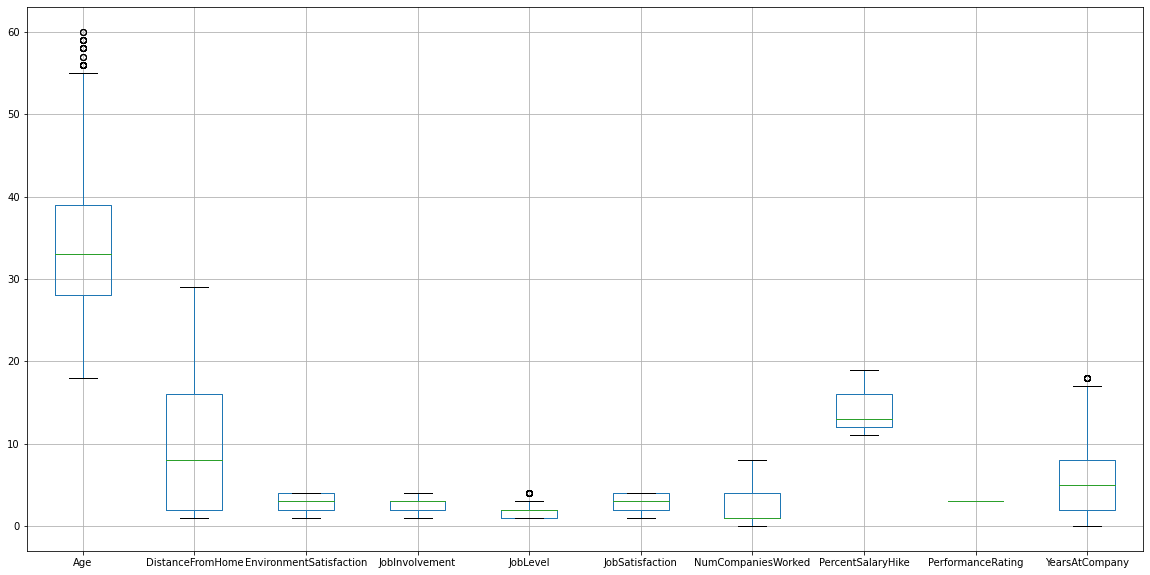

In [7]:
plt.figure(figsize=(20,10))
df.drop('MonthlyIncome', axis=1).boxplot()
plt.show()

In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

df_without_out=df[~((df<lower_limit) | (df>upper_limit)).any(axis=1)]
df_without_out

<ipython-input-8-88468df27c32>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_without_out=df[~((df<lower_limit) | (df>upper_limit)).any(axis=1)]
<ipython-input-8-88468df27c32>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_without_out=df[~((df<lower_limit) | (df>upper_limit)).any(axis=1)]


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,30,No,Travel_Rarely,Research & Development,2,Medical,2,Male,2,1,Laboratory Technician,4,2720,0,No,13,3,5
1575,28,Yes,Non-Travel,Research & Development,24,Technical Degree,2,Male,2,3,Healthcare Representative,1,8722,1,No,12,3,10
1577,30,Yes,Travel_Rarely,Sales,9,Medical,2,Male,3,1,Sales Representative,4,1081,1,No,13,3,1
1578,31,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Female,3,2,Manufacturing Director,1,4148,1,No,12,3,4


<AxesSubplot:>

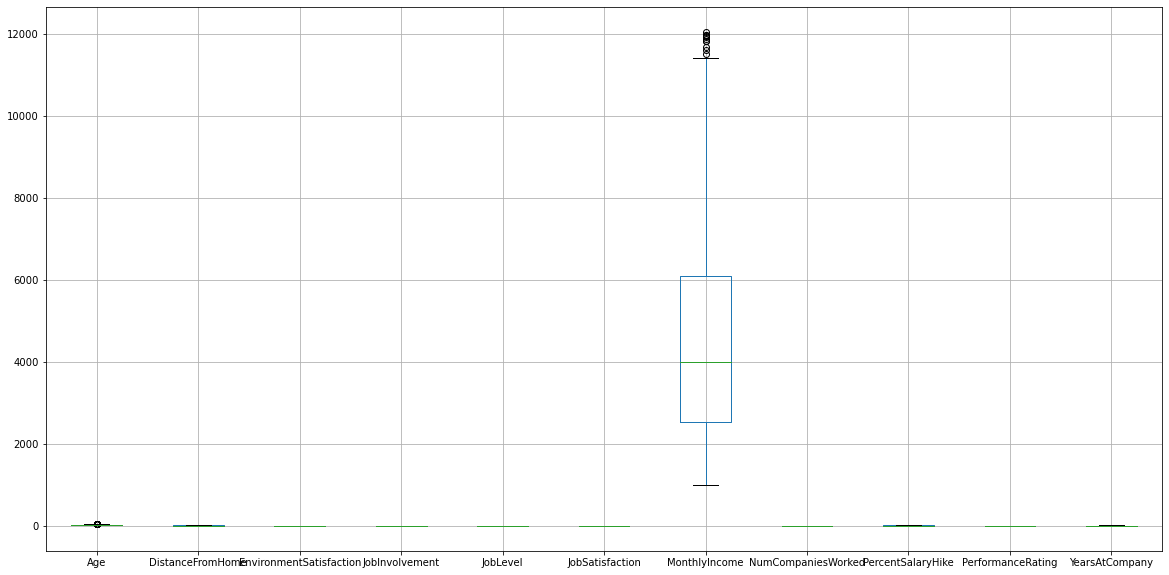

In [9]:
plt.figure(figsize=(20,10))
df_without_out.boxplot()

In [10]:
q1=df['MonthlyIncome'].quantile(0.25)
q3=df['MonthlyIncome'].quantile(0.75)

IQR=q3-q1

l_limit=q1-1.5*IQR
u_limit=q3+1.5*IQR

df_mi=df[(df['MonthlyIncome']<l_limit) | (df['MonthlyIncome']>u_limit)]
df_mi['JobRole'].value_counts()

Research Director            21
Manager                      12
Sales Executive               9
Healthcare Representative     7
Manufacturing Director        4
Name: JobRole, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
num=df_without_out.select_dtypes(include=np.number)
cat=df_without_out.select_dtypes(include="object")
dum=pd.get_dummies(cat,drop_first=True)
df1=pd.concat([num,dum],axis=1)
df2=df1.drop('Attrition_Yes',axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1579
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1487 non-null   int64
 1   DistanceFromHome                   1487 non-null   int64
 2   EnvironmentSatisfaction            1487 non-null   int64
 3   JobInvolvement                     1487 non-null   int64
 4   JobLevel                           1487 non-null   int64
 5   JobSatisfaction                    1487 non-null   int64
 6   MonthlyIncome                      1487 non-null   int64
 7   NumCompaniesWorked                 1487 non-null   int64
 8   PercentSalaryHike                  1487 non-null   int64
 9   PerformanceRating                  1487 non-null   int64
 10  YearsAtCompany                     1487 non-null   int64
 11  BusinessTravel_Travel_Frequently   1487 non-null   uint8
 12  BusinessTravel_Trave

In [12]:
X=df1[['EnvironmentSatisfaction','MonthlyIncome']]
X=sm.add_constant(X)
y=df1['Attrition_Yes']

X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=10, test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',random_state=10)

model2=dtc.fit(X_train,y_train)

In [14]:
y_pred=model2.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.8657718120805369


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
X=df1.drop('Attrition_Yes',axis=1)
y=df1['Attrition_Yes']
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=10, test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=10)

model3=dtc.fit(X_train,y_train)

In [18]:
y_pred_full=model3.predict(X_test)

In [19]:
imp_feat=pd.DataFrame({'Features':X_train.columns,'Importance':model3.feature_importances_})

imp_feat.sort_values(by='Importance',ascending=False)

,Features,Importance
0,Age,0.150081
6,MonthlyIncome,0.134097
1,DistanceFromHome,0.097001
10,YearsAtCompany,0.068787
29,OverTime_Yes,0.068532
3,JobInvolvement,0.065690
8,PercentSalaryHike,0.059935
7,NumCompaniesWorked,0.058395
5,JobSatisfaction,0.048514
2,EnvironmentSatisfaction,0.043252


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

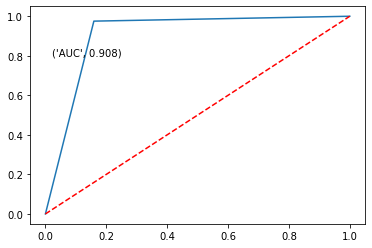

In [20]:
# type your code here
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred_full)

plt.plot(fpr,tpr)

plt.plot([0,1],'r--')

plt.text(x=0.02,y=0.8,s=('AUC',round(roc_auc_score(y_test,y_pred_full),4)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_full)
cm

array([[206,  39],
       [  5, 197]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_full))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       245
           1       0.83      0.98      0.90       202

    accuracy                           0.90       447
   macro avg       0.91      0.91      0.90       447
weighted avg       0.91      0.90      0.90       447



In [23]:
tn, fp,fn, tp=cm.ravel()

print('Specificity: ', tn/(tn+fp))
print('Sensitivity:', tp/(tp+fn))

print('Correctly Classified:',accuracy_score(y_test,y_pred_full))
print('% of Misclassified:',1-accuracy_score(y_test,y_pred_full))

Specificity:  0.8408163265306122
Sensitivity: 0.9752475247524752
Correctly Classified: 0.901565995525727
% of Misclassified: 0.09843400447427297


Yes, it is a good model!

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [25]:

dtc7 = DecisionTreeClassifier(max_leaf_nodes= 5)

dt_model = dtc7.fit(X_train , y_train)

labels = X_train.columns

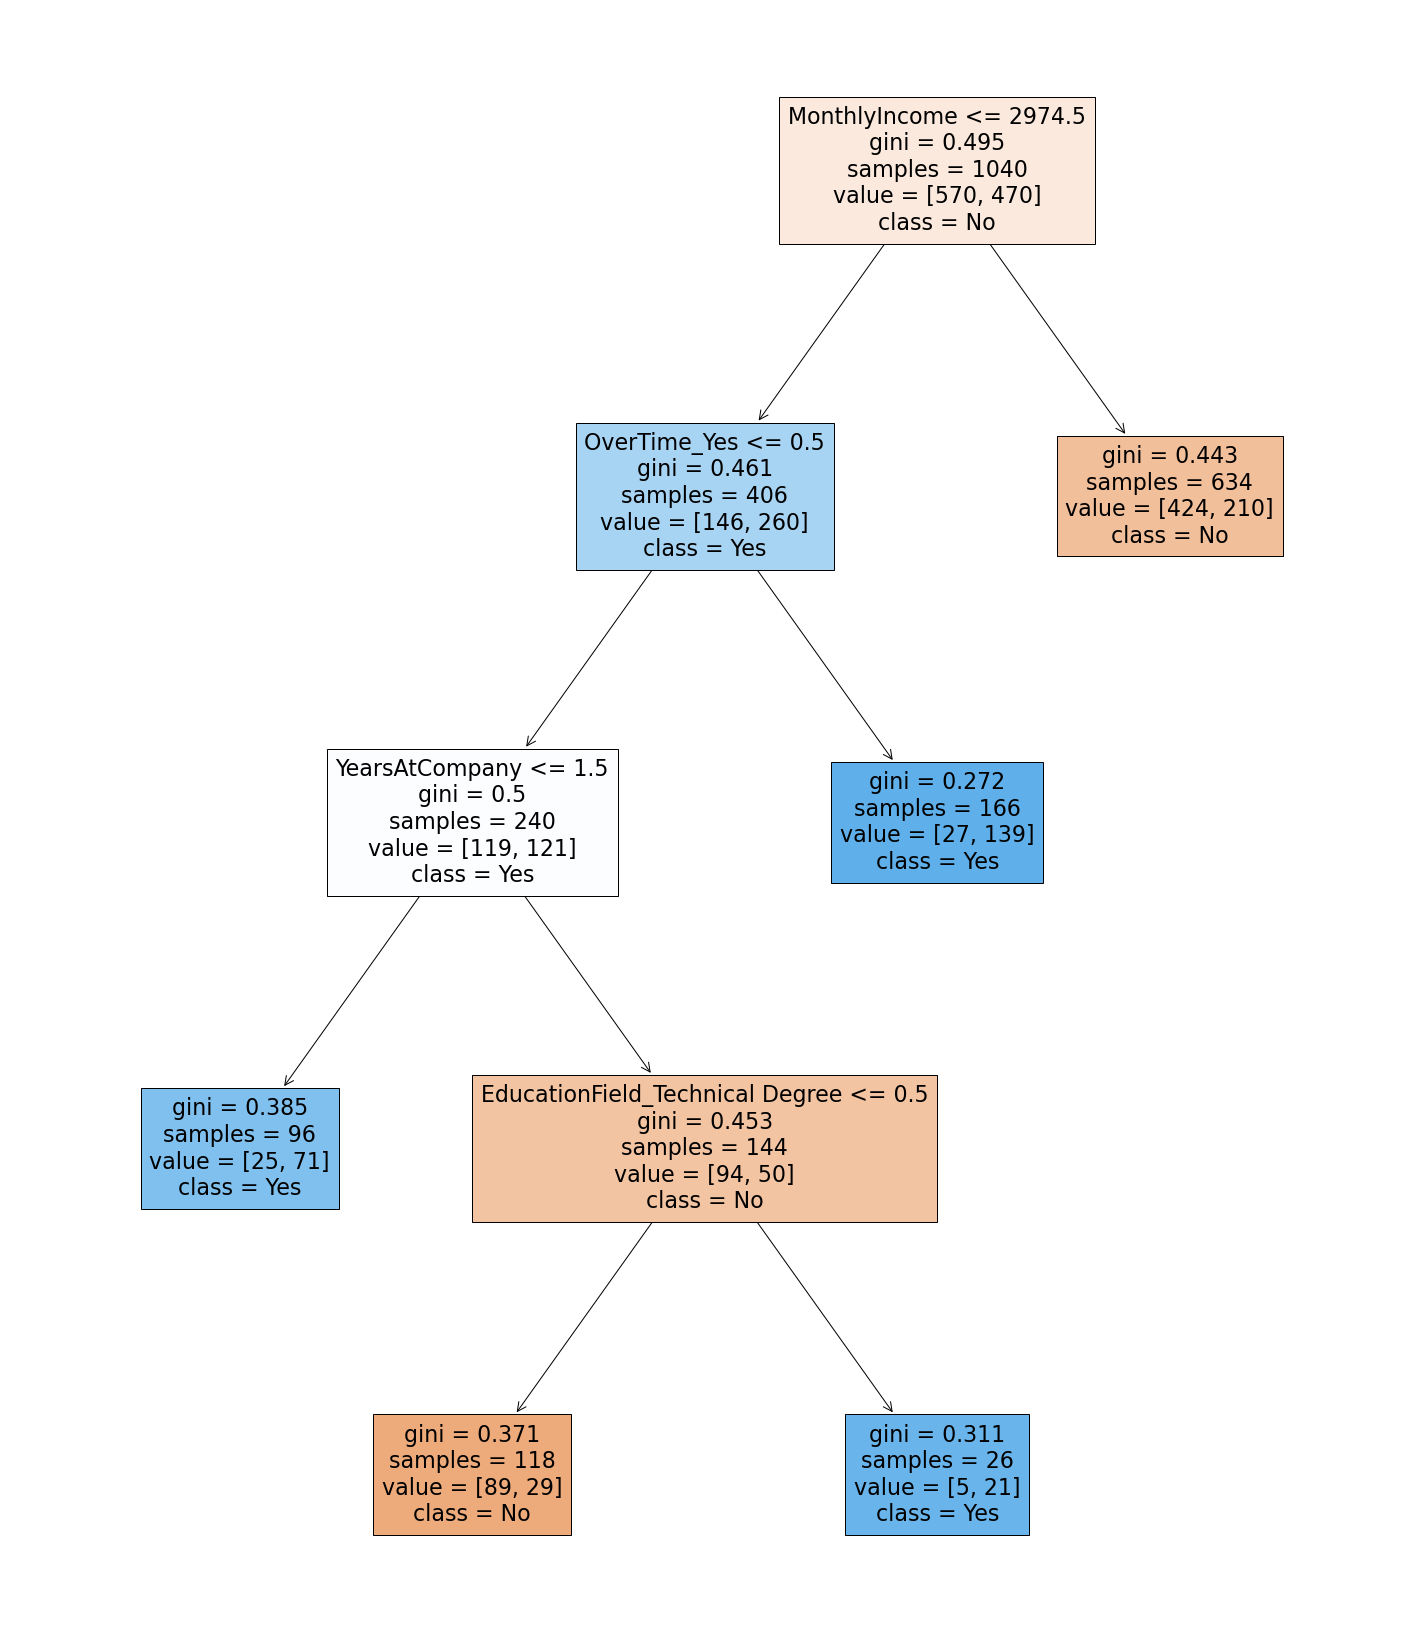

In [26]:
from sklearn import tree

plt.figure(figsize=(25,30))
tree.plot_tree(dtc7, 
                   feature_names=X_train.columns,  
                   class_names=['No','Yes'],
                   filled=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [28]:
dtc1=DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
score=cross_val_score(estimator=dtc1, X=X_train, y=y_train,cv=10, scoring='accuracy')

print('Mean accuracy after 10 fold cross validation:', round(score.mean(),2))

Mean accuracy after 10 fold cross validation: 0.88


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [29]:
# type your code here
tune_parameter= [{'criterion' : ['entropy', 'gini'],
     'max_depth' : range(2, 10),
     'min_samples_split' : range(2,10)}]

In [30]:
dtc3=DecisionTreeClassifier(random_state=10)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = dtc, 
                         param_grid = tune_parameter, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_tuned_model = DecisionTreeClassifier(criterion = tree_grid.best_params_['criterion'], 
                                                   max_depth = tree_grid.best_params_['max_depth'], 
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'])

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
scores = cross_val_score(estimator = decision_tree_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.87


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
import random
# get the columns from X_train
columns = list(X_train.columns)

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 1
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_1 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_1 = dt_model_1.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_1
y_pred_1 = dt_model_1.predict(X_test[sample_features])

# get the columns from X_train
columns = list(X_train.columns)

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 1
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_1 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_1 = dt_model_1.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_1
y_pred_1 = dt_model_1.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 2
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_2 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_2 = dt_model_2.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_2
y_pred_2 = dt_model_2.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 3
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_3 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_3 = dt_model_3.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_3
y_pred_3 = dt_model_3.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 4
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_4 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_4 = dt_model_4.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_4
y_pred_4 = dt_model_4.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 5
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_5 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_5 = dt_model_5.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_5
y_pred_5 = dt_model_5.predict(X_test[sample_features])
###################################################################################

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
# create a dataframe "model_predictions_df" using the predictions obtained from the decision tree models
model_predictions_df = pd.DataFrame({"y_pred_1": y_pred_1, 
                                     "y_pred_2": y_pred_2,
                                     "y_pred_3": y_pred_3,
                                     "y_pred_4": y_pred_4,
                                     "y_pred_5": y_pred_5})
model_predictions_df.head()

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5
0,0,0,0,0,1
1,1,0,0,0,0
2,1,1,1,1,1
3,1,0,0,0,0
4,0,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
# empty list to store the votes result 
votes = []

# for loo to find the maximum occuring values from each row and append it to the list "votes"
for i in range(model_predictions_df.shape[0]):
    votes.append(model_predictions_df.iloc[i].value_counts().index[0])
    
# create a column "Voted_Result" and store the votes
model_predictions_df['Voted_Result'] = votes

model_predictions_df.head()

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,Voted_Result
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,1,1,1,1,1,1
3,1,0,0,0,0,0
4,0,0,1,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
# store the voted result in the variable y_pred_voted
y_pred_voted = model_predictions_df['Voted_Result']

# print the roc-auc score 
print("The ROC-AUC Score is: ", roc_auc_score(y_test, y_pred_voted))

# print the accuracy
print("The Accuracy is: ", accuracy_score(y_test, y_pred_voted))

The ROC-AUC Score is:  0.9380783996767024
The Accuracy is:  0.9373601789709173


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_classification= RandomForestClassifier(n_estimators=10,random_state=10)
# type your code here
rf_model=rf_classification.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       245
           1       0.91      0.95      0.93       202

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [47]:
# type your code here
tuned_parameter= [{'criterion': ['entropy', 'gini'],
    'n_estimators': [90, 100, 150, 200],
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [2, 5, 8]}]

In [49]:
rfc=RandomForestClassifier(random_state=10)
tree_grid = GridSearchCV(estimator = rfc, 
                         param_grid = tuned_parameter, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Random Forest Classifier: ', tree_grid.best_params_, '\n')

Best parameters for Random Forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 90} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code

random_forest_tuned_model = RandomForestClassifier(criterion = tree_grid.best_params_['criterion'], 
                                                   max_depth = tree_grid.best_params_['max_depth'], 
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'], 
                                                   n_estimators = tree_grid.best_params_['n_estimators'],
                                                   random_state = 10)

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.99


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

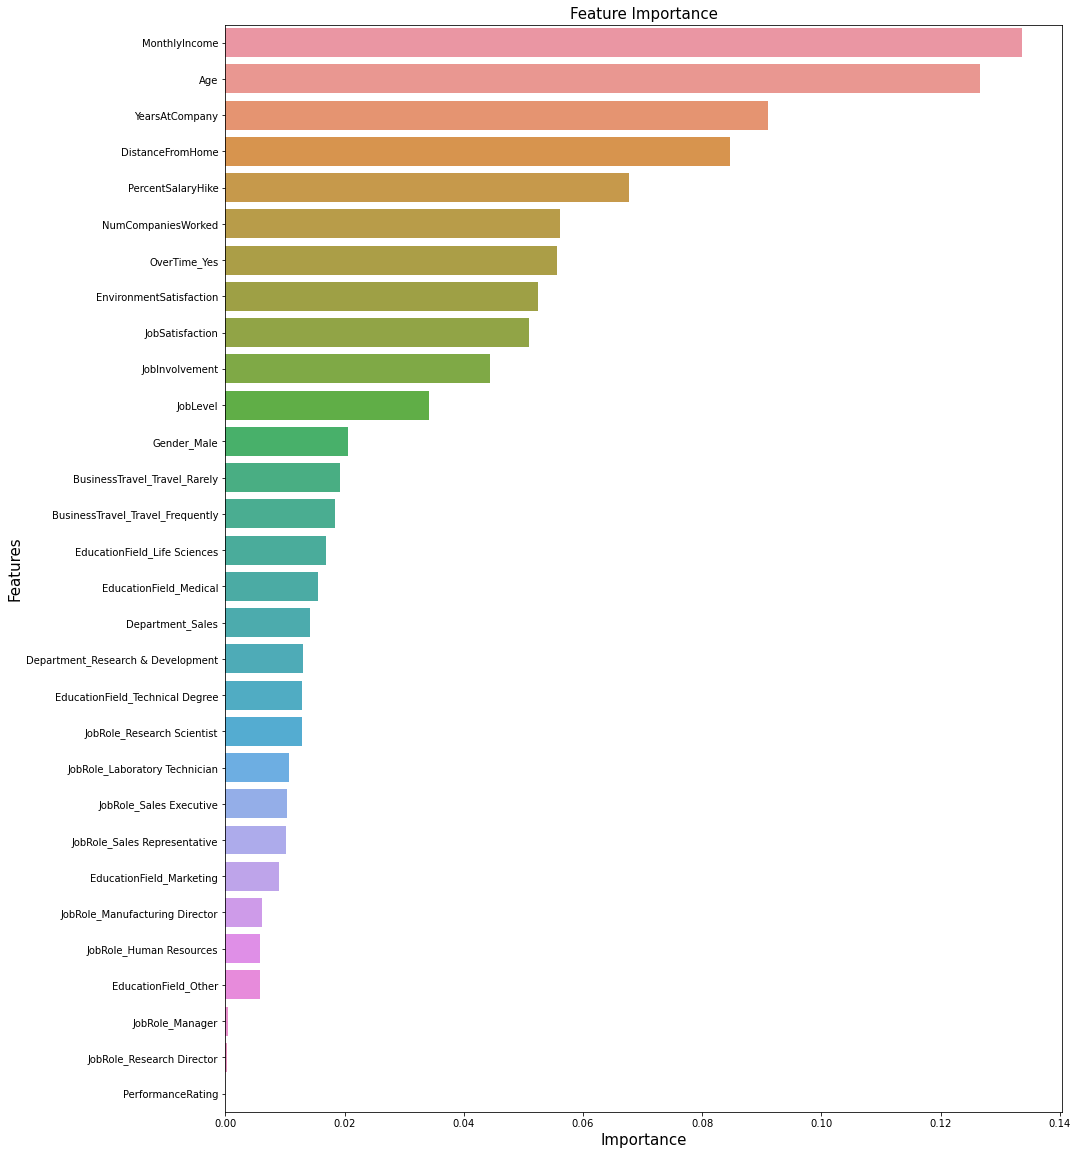

,Features,Importance
6,MonthlyIncome,0.133727
0,Age,0.126682
10,YearsAtCompany,0.091014
1,DistanceFromHome,0.084646
8,PercentSalaryHike,0.067726
7,NumCompaniesWorked,0.056106
29,OverTime_Yes,0.055584
2,EnvironmentSatisfaction,0.052527
5,JobSatisfaction,0.050996
3,JobInvolvement,0.044430


In [58]:
# type your code here
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 15, 
                                                   min_samples_split = 2, n_estimators = 90,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15,20))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


# display the plot
plt.show()

important_features

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
19. # type your code here
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 15, 
                                                   min_samples_split = 2, n_estimators = 90,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train[important_columns], y_train)

# predict the attrition for test set
y_pred = random_forest_tuned_model.predict(X_test[important_columns])

X_train[important_columns]


,MonthlyIncome,Age,YearsAtCompany,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,OverTime_Yes,EnvironmentSatisfaction,JobSatisfaction,JobInvolvement
389,2716,21,1,12,15,1,0,3,2,4
1236,2778,41,7,2,13,4,1,2,4,1
365,3477,31,5,2,14,1,0,2,3,3
558,2468,38,6,2,14,4,0,3,2,2
1359,8396,40,7,26,14,1,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...
1475,3291,29,7,10,14,0,0,4,2,3
1425,2127,41,4,5,12,2,1,2,3,4
561,6516,40,1,8,16,2,1,2,1,3
1217,4400,25,3,9,12,3,0,1,1,2


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

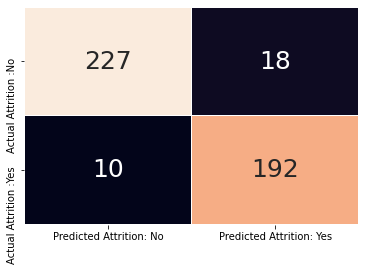

In [57]:
# type your code here
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

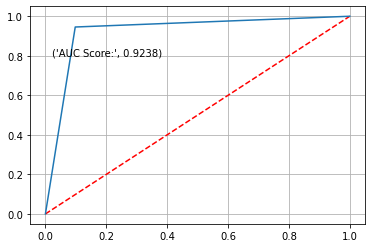

In [66]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)